In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:14 http://security.ubuntu.c

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"
import findspark
findspark.init()

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName("The_Evolution_of_Genes_in_Viruses_and_Bacteria").getOrCreate()

In [5]:
df = spark.read.csv("/content/NCBI_Escherichia_coli_genomes.csv", header=True, inferSchema=True)

In [6]:
df.show(2)

+----------------+--------------------+--------+------------+----------+---------------+--------+--------+----+---------+------+---------+----+-------------------+--------------------+--------------------+
|  #Organism Name|     Organism Groups|  Strain|   BioSample|BioProject|       Assembly|   Level|Size(Mb)| GC%|Replicons|   WGS|Scaffolds| CDS|       Release Date|         GenBank FTP|          RefSeq FTP|
+----------------+--------------------+--------+------------+----------+---------------+--------+--------+----+---------+------+---------+----+-------------------+--------------------+--------------------+
|Escherichia coli|Bacteria;Proteoba...| IMT2125|SAMEA2272029|   PRJEB51|GCA_000308975.2|Scaffold| 4.75415|50.7|     null|CAJT01|        1|4266|2012-08-01 00:00:00|ftp://ftp.ncbi.nl...|ftp://ftp.ncbi.nl...|
|Escherichia coli|Bacteria;Proteoba...|NCTC9050|SAMEA3376907| PRJEB6403|GCA_900448985.1|  Contig| 5.84429|50.6|     null|UGBX01|        4|5283|2018-07-30 00:00:00|ftp://ftp.ncb

In [7]:
df.printSchema()

root
 |-- #Organism Name: string (nullable = true)
 |-- Organism Groups: string (nullable = true)
 |-- Strain: string (nullable = true)
 |-- BioSample: string (nullable = true)
 |-- BioProject: string (nullable = true)
 |-- Assembly: string (nullable = true)
 |-- Level: string (nullable = true)
 |-- Size(Mb): double (nullable = true)
 |-- GC%: double (nullable = true)
 |-- Replicons: string (nullable = true)
 |-- WGS: string (nullable = true)
 |-- Scaffolds: integer (nullable = true)
 |-- CDS: integer (nullable = true)
 |-- Release Date: timestamp (nullable = true)
 |-- GenBank FTP: string (nullable = true)
 |-- RefSeq FTP: string (nullable = true)



In [8]:
#Descriptive statistics include those that summarize 
#the central tendency, dispersion and shape of a dataset’s 
#distribution, excluding NaN values.
df.describe().toPandas()

,summary,#Organism Name,Organism Groups,Strain,BioSample,BioProject,Assembly,Level,Size(Mb),GC%,Replicons,WGS,Scaffolds,CDS,GenBank FTP,RefSeq FTP
0,count,24008,24008,23987,24008,24008,24008,24008,24008,24008,2150,22032,24008,24008,24008,23600
1,mean,None,None,Infinity,None,None,None,None,5.125968848717103,50.570196412027684,None,None,198.0277824058647,4672.334638453849,None,None
2,stddev,None,None,NaN,None,None,None,None,0.3503236714915195,1.062615829444325,None,None,285.8886670074898,711.7808094862417,None,None
3,min,Escherichia coli,Bacteria;Proteobacteria;Gammaproteobacteria,0.1288,SAMD00000764,PRJDA19053,GCA_000005845.2,Chromosome,0.104143,0.0,chromosome 0:NZ_LR130532.1/LR130532.1,AAJT02,1,0,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...
4,max,synthetic Escherichia coli C321.deltaA,Bacteria;Proteobacteria;Gammaproteobacteria,zlp18,SAMN19493560,PRJNA94343,GCA_907275105.1,Scaffold,17.47,58.9,plasmid unnamed:NZ_JAFEKJ000000000.1/JAFEKJ000...,WXZA01,8122,11884,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/907...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/907...


In [9]:
#Unction is used to collect the identical data into groups 
#and perform aggregate functions like size/count on the grouped data
df.groupBy('RefSeq FTP').count().show()

+--------------------+-----+
|          RefSeq FTP|count|
+--------------------+-----+
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
|ftp://ftp.ncbi.nl...|    1|
+--------------------+-----+
only showing top 20 rows



In [10]:
df.groupBy('Replicons').count().show()

+--------------------+-----+
|           Replicons|count|
+--------------------+-----+
|chromosome:NZ_CP0...|    1|
|chromosome:NZ_CP0...|    1|
|chromosome:NZ_CP0...|    1|
|chromosome:NC_012...|    1|
|plasmid URMC_95_p...|    1|
|chromosome:CP0121...|    1|
|chromosome:NZ_CP0...|    1|
|chromosome 1:NZ_L...|    1|
|chromosome:NZ_CP0...|    1|
|chromosome:NZ_CP0...|    1|
|chromosome:NC_002...|    1|
|chromosome:NZ_CP0...|    1|
|chromosome:NZ_CP0...|    1|
|chromosome:NZ_CP0...|    1|
|plasmid URMC_3_p_...|    1|
|chromosome HB37:N...|    1|
|chromosome:NZ_CP0...|    1|
|chromosome:NZ_CP0...|    1|
|plasmid pFHI_NMBU...|    1|
|chromosome:NZ_CP0...|    1|
+--------------------+-----+
only showing top 20 rows



In [11]:
df.groupBy('Strain').count().show()

+----------------+-----+
|          Strain|count|
+----------------+-----+
|          ESBL13|    1|
|     E.coli C158|    1|
|            17-2|    1|
|     2016-02-418|    1|
|         UMB0727|    1|
|         GZB8C4M|    1|
|         UMB6713|    1|
|        VREC0516|    1|
|           45300|    1|
|        GMC10974|    1|
|           Ec004|    1|
|           F2_99|    1|
|           1232a|    1|
|Broiler parent55|    1|
|            L172|    1|
|   46_Esco_HA-DE|    1|
|           EC482|    1|
|            F2_3|    1|
|         18FS1-2|    1|
|     MOD1-EC6197|    1|
+----------------+-----+
only showing top 20 rows



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

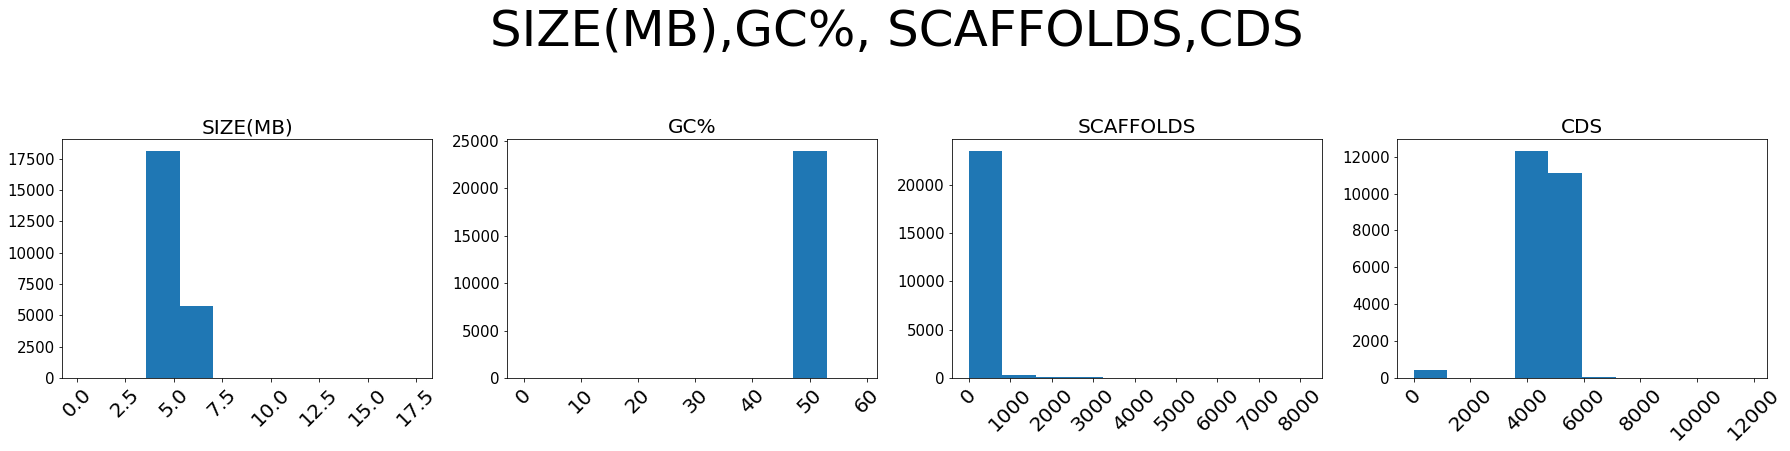

In [13]:
fig = plt.figure(figsize=(25, 15))
st = fig.suptitle("SIZE(MB),GC%, SCAFFOLDS,CDS", fontsize=50, verticalalignment="center")
for col , num in zip(df.toPandas().describe().columns, range(1,11)):
     ax = fig.add_subplot(3,4,num)
     ax.hist(df.toPandas()[col])
     plt.grid(False)
     plt.xticks(rotation=45, fontsize=20)
     plt.yticks(fontsize=15)
     plt.title(col.upper(), fontsize=20)
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()

In [14]:
from pyspark.sql.functions import lit
df = df.withColumn('first_column',lit(1))

df.show(5,truncate=False)

+----------------+-------------------------------------------+------------+------------+-----------+---------------+--------+--------+----+---------+------+---------+----+-------------------+----------------------------------------------------------------------------------+----------------------------------------------------------------------------------+------------+
|#Organism Name  |Organism Groups                            |Strain      |BioSample   |BioProject |Assembly       |Level   |Size(Mb)|GC% |Replicons|WGS   |Scaffolds|CDS |Release Date       |GenBank FTP                                                                       |RefSeq FTP                                                                        |first_column|
+----------------+-------------------------------------------+------------+------------+-----------+---------------+--------+--------+----+---------+------+---------+----+-------------------+-------------------------------------------------------------------

In [15]:
df = df.withColumn('second_column', lit(2)) \
      .withColumn('third_column', lit('Third Column'))
df.show(5,truncate=False)

+----------------+-------------------------------------------+------------+------------+-----------+---------------+--------+--------+----+---------+------+---------+----+-------------------+----------------------------------------------------------------------------------+----------------------------------------------------------------------------------+------------+-------------+------------+
|#Organism Name  |Organism Groups                            |Strain      |BioSample   |BioProject |Assembly       |Level   |Size(Mb)|GC% |Replicons|WGS   |Scaffolds|CDS |Release Date       |GenBank FTP                                                                       |RefSeq FTP                                                                        |first_column|second_column|third_column|
+----------------+-------------------------------------------+------------+------------+-----------+---------------+--------+--------+----+---------+------+---------+----+-------------------+-------------

In [16]:
df = spark.read.csv("/content/read_manifest.csv", header=True, inferSchema=True)
df.show(10)

+-------------+-----+
|     specimen|GROUP|
+-------------+-----+
|SRR19177897_1|    0|
|SRR19177897_2|    0|
|SRR19178189_1|    1|
|SRR19178189_2|    1|
+-------------+-----+



In [17]:
from pyspark.sql.functions import isnan,when, count , col

In [18]:
df.select([count(when(isnan(c),c)).alias(c) for c in df.columns]).head()

Row(specimen=0, GROUP=0)

In [19]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [20]:
y_udf = udf(lambda y: "no" if y == 0 else "yes", StringType())

In [21]:
df.show(5)

+-------------+-----+
|     specimen|GROUP|
+-------------+-----+
|SRR19177897_1|    0|
|SRR19177897_2|    0|
|SRR19178189_1|    1|
|SRR19178189_2|    1|
+-------------+-----+



In [22]:
def udf_multi(specimen):
  if(specimen<4):
    return "Under 4"
  elif (specimen >= 4 and specimen <4):
    return "Between 8 and 9"
  elif (specimen >10 and specimen <15):
    return "Between 16 and 50"
  elif (specimen >= 20):
    return "Over 20"
  else: return "NA"


In [23]:
specimen_udf = udf(udf_multi)
df = df.withColumn('specimen_udf', specimen_udf('specimen'))